# Descriptive analytics

## Data preparation

In [13]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

matches = pd.read_csv('data/matches.csv')
heroesDf = pd.read_csv('data/heroes.csv')

# hero count + 1 result column
totalColumns = len(heroesDf) + 1

X = matches.iloc[:, 0:].values

outputRows = np.zeros((X.shape[0], totalColumns), dtype=int)
i = 0
for row in X:
    # Team A 1
    outputRows[i][row[0] - 1] = 1
    outputRows[i][row[1] - 1] = 1
    outputRows[i][row[2] - 1] = 1
    outputRows[i][row[3] - 1] = 1
    outputRows[i][row[4] - 1] = 1
    # Team B -1
    outputRows[i][row[5] - 1] = -1
    outputRows[i][row[6] - 1] = -1
    outputRows[i][row[7] - 1] = -1
    outputRows[i][row[8] - 1] = -1
    outputRows[i][row[9] - 1] = -1
    # Result
    outputRows[i][totalColumns - 1] = row[10]
    i = i + 1

oneHotDf = pd.DataFrame(outputRows)
oneHotDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,-1,0,0,0,0,1
1,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,-1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [14]:
hero_id_mapping = {i: hero_name for i, hero_name in enumerate(heroesDf['Hero'])}

heroes_df = oneHotDf.iloc[:, :-1] # Take all heroes columns

# Substitute column with real hero names
heroes_df.rename(columns=hero_id_mapping, inplace=True)

heroes_df

,Miya,Balmond,Saber,Alice,Nana,Tigreal,Alucard,Karina,Akai,Franco,...,Fredrinn,Joy,Novaria,Arlott,Ixia,Nolan,Cici,Chip,Zhuxin,Suyou
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,-1,0,0,0,0
1,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,-1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13957,0,0,0,0,0,0,0,0,0,0,...,-1,0,-1,0,0,0,0,0,0,0
13958,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,1,0,0,0
13959,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


## Top Pick Heroes

In [15]:
heroes_picks = heroes_df.astype(bool).sum(axis=0)
heroes_picks

Miya        46
Balmond    774
Saber      269
Alice      988
Nana       271
          ... 
Nolan      151
Cici       143
Chip         0
Zhuxin       0
Suyou        0
Length: 126, dtype: int64

In [16]:
print("Most playable hero:\n", (heroes_picks.idxmax(), heroes_picks.max()))
print("Least playable hero:\n", (heroes_picks.idxmin(), heroes_picks.min()))

Most playable hero:
 ('Beatrix', 3958)
Least playable hero:
 ('Chip', 0)


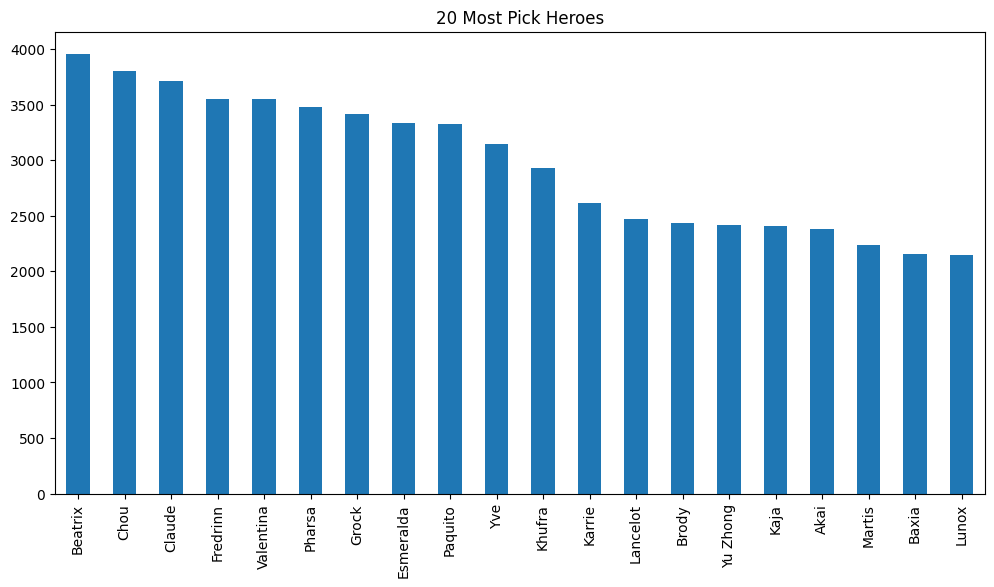

In [37]:
heroes_20 = heroes_picks.sort_values(ascending=False).iloc[:20]
_ = heroes_20.plot(kind='bar', figsize=(12,6), title='20 Most Pick Heroes')

## Win Rate

In [31]:
heroes_mat = heroes_df.to_numpy()
team_col = oneHotDf[126].to_numpy()[:, np.newaxis] # 126 is last column (result)
team_col.shape, heroes_mat.shape

((13961, 1), (13961, 126))

In [32]:
win_mat = abs(heroes_mat + np.tile(team_col, (1, heroes_mat.shape[1]))) // 2
win_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [33]:
lose_mat = abs(heroes_mat) - win_mat
lose_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
win_rate_df = pd.DataFrame.from_dict({'WINS': win_mat.sum(axis=0), 
                                      'LOSES': lose_mat.sum(axis=0)}).set_index(heroes_df.columns)
win_rate_df['WIN RATE'] = np.round(win_rate_df['WINS'] / (win_rate_df['WINS'] + win_rate_df['LOSES']) * 100, 2)
win_rate_df

,WINS,LOSES,WIN RATE
Miya,11,35,23.91
Balmond,185,589,23.90
Saber,63,206,23.42
Alice,239,749,24.19
Nana,56,215,20.66
...,...,...,...
Nolan,51,100,33.77
Cici,45,98,31.47
Chip,0,0,NaN
Zhuxin,0,0,NaN


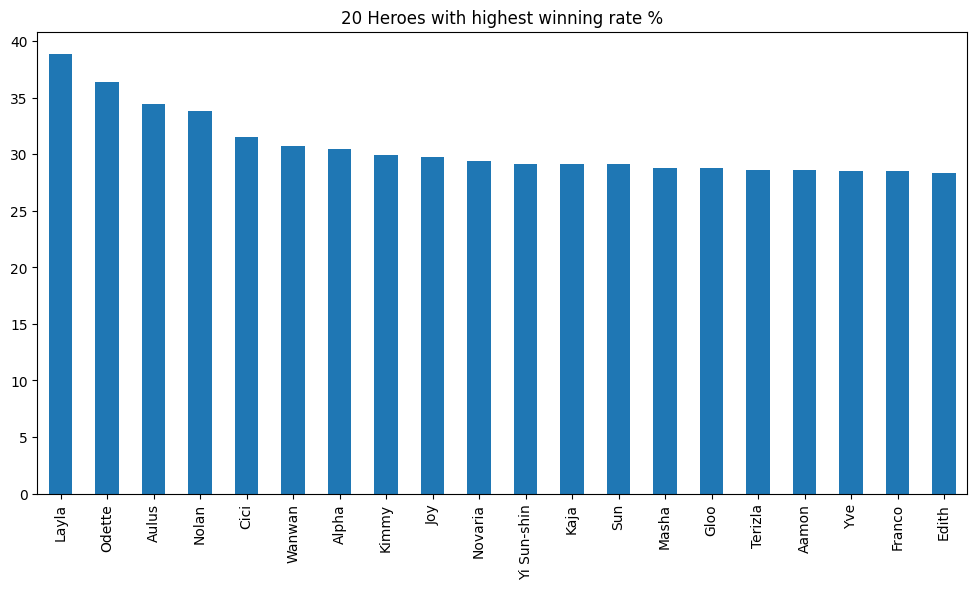

In [36]:
win_rate_20 = win_rate_df['WIN RATE'].sort_values(ascending=False).iloc[:20]
_ = win_rate_20.plot(kind='bar', figsize=(12,6), title='20 Heroes with highest winning rate %')

## Frequent team combinations (Apriori algorithm)

In [38]:
teams = [tuple(row.nonzero()[0]) for row in (heroes_df == 1).to_numpy()] + \
        [tuple(row.nonzero()[0]) for row in (heroes_df == -1).to_numpy()] 
teams

[(11, 18, 79, 85, 110),
 (25, 34, 39, 43, 109),
 (3, 29, 36, 86, 95),
 (75, 81, 99, 101, 117),
 (47, 81, 99, 116, 118),
 (22, 28, 82, 104, 116),
 (8, 64, 77, 97, 109),
 (27, 51, 58, 64, 77),
 (51, 61, 96, 99, 116),
 (9, 82, 88, 102, 109),
 (36, 39, 61, 98, 100),
 (25, 51, 98, 110, 113),
 (8, 36, 61, 104, 109),
 (43, 57, 75, 102, 113),
 (20, 34, 109, 113, 119),
 (12, 47, 83, 102, 115),
 (1, 28, 84, 100, 104),
 (8, 28, 62, 80, 104),
 (1, 31, 74, 102, 104),
 (8, 74, 77, 102, 104),
 (1, 84, 99, 101, 114),
 (7, 12, 43, 92, 114),
 (39, 50, 84, 87, 100),
 (7, 25, 80, 99, 100),
 (38, 85, 94, 99, 101),
 (12, 16, 77, 80, 100),
 (54, 70, 80, 83, 84),
 (51, 57, 72, 80, 83),
 (51, 58, 62, 64, 102),
 (51, 62, 82, 99, 107),
 (7, 33, 94, 99, 100),
 (3, 5, 10, 38, 54),
 (11, 47, 58, 72, 101),
 (24, 53, 58, 64, 96),
 (11, 13, 53, 72, 94),
 (53, 62, 72, 78, 94),
 (11, 13, 20, 53, 62),
 (3, 49, 77, 78, 96),
 (36, 62, 64, 89, 96),
 (46, 51, 56, 58, 93),
 (3, 13, 36, 78, 101),
 (1, 38, 62, 80, 93),
 (54, 64

In [41]:
from apyori import apriori

rules = apriori(teams, min_support=0.005, min_confidence=0.05, min_lift=1.1)
rules = list(rules)
rules.sort(key=lambda x: x.support, reverse=True)

In [58]:
def calc_pair_win_rate(heroes_df, *hero_ids):
    # Convert hero IDs to column names
    hero_columns = [heroes_df.columns[hero_id - 1] for hero_id in hero_ids]
    
    # Create a DataFrame for the selected heroes
    selected_heroes_df = heroes_df[hero_columns]
    
    # Check if all selected heroes are picked by team A (1)
    all_picked_by_team_a = selected_heroes_df.sum(axis=1) == len(hero_ids)
    
    # Calculate the win rate
    win_count = all_picked_by_team_a.sum()
    total_count = len(heroes_df)
    
    if total_count == 0:
        win_rate = 0.0
    else:
        win_rate = (win_count / total_count) * 100
    
    return round(win_rate, 2)

In [61]:
id_to_name = dict(zip(range(1, len(heroes_df.columns) + 1), heroes_df.columns))

for rule in rules:
    if len(rule.items) > 1:
        print("=====================================")

        for hero_id in rule.items:
            print(f'HeroId: {id_to_name[hero_id]}, ', end='')
        print(f'\nProbability: {np.round(rule.support * 100, 2)}%')
        print(f'Winning rate: {calc_pair_win_rate(oneHotDf, *rule.items)}%')

print("=====================================")

HeroId: Julian, HeroId: Aamon, 
Probability: 2.57%
Winning rate: 0.01%
HeroId: Gloo, HeroId: Julian, 
Probability: 2.35%
Winning rate: 0.07%
HeroId: Gloo, HeroId: Aamon, 
Probability: 2.26%
Winning rate: 0.02%
HeroId: Aldous, HeroId: Julian, 
Probability: 2.16%
Winning rate: 0.0%
HeroId: Helcurt, HeroId: Julian, 
Probability: 2.15%
Winning rate: 0.02%
HeroId: Gloo, HeroId: Brody, 
Probability: 2.1%
Winning rate: 0.61%
HeroId: Aldous, HeroId: Aamon, 
Probability: 2.01%
Winning rate: 0.01%
HeroId: Gloo, HeroId: Mathilda, 
Probability: 1.93%
Winning rate: 0.33%
HeroId: Irithel, HeroId: Aamon, 
Probability: 1.92%
Winning rate: 0.04%
HeroId: Aldous, HeroId: Irithel, 
Probability: 1.89%
Winning rate: 0.0%
HeroId: Julian, HeroId: Brody, 
Probability: 1.73%
Winning rate: 0.07%
HeroId: Valir, HeroId: Aamon, 
Probability: 1.62%
Winning rate: 0.0%
HeroId: Helcurt, HeroId: Badang, 
Probability: 1.58%
Winning rate: 0.01%
HeroId: Barats, HeroId: Julian, 
Probability: 1.57%
Winning rate: 0.03%
HeroId